In [1]:
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np
import matplotlib

In [3]:
sbn.set()

# Leyes de Newton 

La segunda ley de Newton puede ser representada como:

$$
\mathbf{F} = m\mathbf{a}=m\mathbf{\ddot{r}} = \mathbf{\dot{p}} = m\mathbf{\dot{v}}
$$

El enunciado básico estipula que la fuerza ejercida en el sistema será equivalente al cambio de su [_momento_](https://es.wikipedia.org/wiki/Cantidad_de_movimiento) en el tiempo o lo que es lo mismo (si la masa es constante en el tiempo) al cambio de la velocidad en tiempo multiplicada por la masa, o bien a la segunda derivada de la posición respecto al tiempo veces la masa del objeto.

Es importante señalar que en la mecánica newtoniana los objetos son representados como masas puntuales ya que, en objetos bien simétricos, podemos estudiar el _centro de masa_ en lugar de estudiar el objeto por completo. Básicamente podemos representar la fuerza como la función vectorial:

$$
\mathbf{F} = \mathbf{F}\left(\mathbf{r},\mathbf{\dot{r}},t\right)
$$

## La Partícula Libre

Este es quizás uno de los problemas más sencillos dentro de la mecánica newtoniana. En este problema vamos a asumir que $\mathbf{F} = \mathbf{0}$ con lo que entonces tenemos la ecuación $m\mathbf{\ddot{r}}=\mathbf{0}$. En general el vector $\mathbf{r}\in\mathbb{R}^n$ pero para simplificar los problemas vamos a simplemente asumir que $r\in\mathbb{R}$ así pasamos de una ecuación diferencial de orden $n$ a una de orden $1$ y así mismo la solución para $r(t)$ será generalizable (es la misma) para todas las componentes del vector. 

El problema se resumen entonces a resolver la siguente ecuación diferencial:
$$
\ddot{r} = 0
$$

Al ser de segundo podríamos aumentar la dimensión para reducir el orden y tener dos ecuaciones de orden $1$. En este caso la ecuación es bastante sencilla en su integración. Así pues si integramos de manera indefinida en ambos lados y usamos el Teorema Fundamental de Cálculo, de la igualdad obtenemos lo siguiente:

$$
\int \ddot{r}\; dt =\int  0\; dt \qquad \implies \qquad \dot{r}(t) = c_{1}
$$

Con $c_1$ una constante. Así obtuvimos que mientras la aceleración es $0$ en todo momento la velocidad del objeto es constante (con valor $c_1$) en tiempo. Ahora bien, para obtener la posición en todo momento basta con resolver la última relación:

$$
\int \dot{r}\; dt =\int  c_{1}\; dt \qquad \implies \qquad r(t) = c_{1}t + c_{2}
$$

Así pues la solución general al problema es la siguiente:

$$
 \left\{ 
         \begin{matrix} \mathbf{\ddot{r}}(t) &=& \mathbf{0}  \\ 
         \mathbf{\dot{r}}(t) &=& \mathbf{c_1}\\
         \mathbf{r}(t) &=& \mathbf{c_1}\, t + \mathbf{c_2}
         \end{matrix}
 \right. 
$$

Si adicional contamos con condiciones inicales a nuestro problema como las siguientes:

$$
 \left\{ 
         \begin{matrix} \mathbf{\ddot{r}}(t=t_0) &=& \mathbf{0}  \\ 
         \mathbf{\dot{r}}(t=t_0) &=& \mathbf{v_0}\\
         \mathbf{r}(t=t_0) &=& \mathbf{r_0}
         \end{matrix}
 \right. 
$$

Entonces, si asumimos por simplicidad que $t_0 = 0$, el conjunto anterio de ecuaciones lo podemos escribir como:

$$
 \left\{ 
         \begin{matrix} \mathbf{\ddot{r}}(t) &=& \mathbf{0}  \\ 
         \mathbf{\dot{r}}(t) &=& \mathbf{v_0}\\
         \mathbf{r}(t) &=& \mathbf{v_0}\,t + \mathbf{r_0}
         \end{matrix}
 \right. 
$$

De manera que este conjunto último es la solución a nuestro problea con valores iniciales. 

Ahora vamos a realizar una breve simulación de las ecuaciones anteriores. Por un lado vamos a proceder con las ecuaciones análiticas mientras que por otro vamos a usar el [método de Euler](../pendulo/pendulo-1.ipynb) integración númerica.

### Simulación partícula libre usando ecuaciones análiticas 

Vamos a partir de considerar el caso unidimensional y con cuatro diferentes condiciones iniciales $v_{0} \in \{0,1.1,2.21,3.14\}$ mientras que en todos los casos $x_{0} = 0$.

Ahora vamos a proceder a realizar una pequeña animación del movimiento de un par de pelotas restringidas a una única dimensión. Para este propósito simplemente debemos programar la función $r(t)$ como una función de sus parámetros y el tiempo. 

In [4]:
r = lambda t,v0,x0 : v0*t + x0

Los parámetros ya los tenemos ahora simplemente vamos a declarar el dominio de la función. Para todos los casos vamos a asumir que $t_0  = 0\,s$ y además que $t_{max} = 4\,s$. Consideremos que las unidades de $[v_0] = m/s^2$. Así pues vamos a tener 100 puntos (o mediciones) espaciadas enter $t_0$ y $t_{max}$.

In [5]:
T = np.linspace(0,4,200)

Ahora vamos a realizar todas las simulaciones y colocar toda la información en un dataframe. 

In [65]:
Data = {}
dummy = []
for v0 in [0,1.1,2.21,3.14]:
    for t in T:
        dummy.append((t,r(t,v0,0)))

In [66]:
Data["Time"],Data["Positions"]=zip(*dummy)

In [67]:
scatter_data = pd.DataFrame(Data)

In [68]:
colors =[f'C{i}' for i in np.arange(1, 5)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(1, 6), colors)

In [69]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color=colors[0], label=r'$v_{0}=0\; m/s$',markerfacecolor=colors[0], markersize=10),
                   Line2D([0], [0], marker='o', color=colors[1], label=r'$v_{0}=1.1\; m/s$',markerfacecolor=colors[1], markersize=10),
                   Line2D([0], [0], marker='o', color=colors[2], label=r'$v_{0}=2.21\; m/s$',markerfacecolor=colors[2], markersize=10),
                   Line2D([0], [0], marker='o', color=colors[3], label=r'$v_{0}=3.14\; m/s$',markerfacecolor=colors[3], markersize=10)]

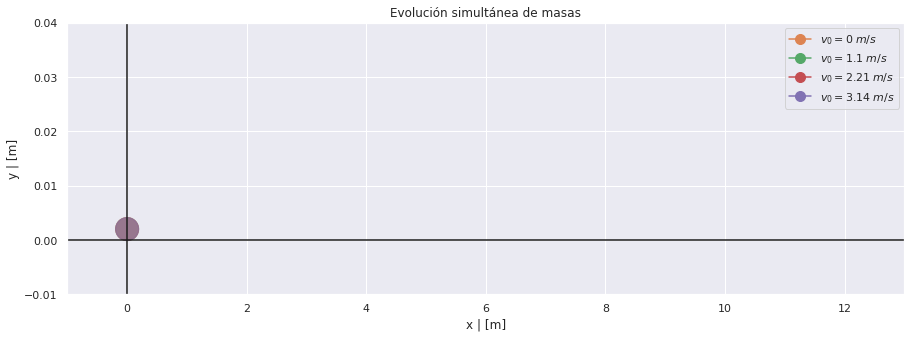

In [84]:
fig, ax = plt.subplots(figsize=(15, 5))

def update_scatter(i):

    time = T[i]

    data_temp = scatter_data.loc[scatter_data['Time'] == time, :]
    
    ax.clear()
    ax.set_xlim(-1,13)
    ax.set_ylim(-0.01,0.04)
    ax.set_title("Evolución simultánea de masas")
    ax.set_xlabel(r"x | [m]")
    ax.set_ylabel(r"y | [m]")
    
    ax.axhline(y=0,xmin=-2,xmax=14,color='k')
    ax.axvline(x=0,ymin=-1,ymax=2,color='k')
    
    ax.scatter(
        data_temp['Positions'].to_numpy(),
        [0.002,0.002,0.002,0.002],
        s=530,
        alpha = 0.5,
        c=colors,
        cmap=cmap,
        norm=norm
    )
    ax.legend(handles=legend_elements)
    
    
anim = animation.FuncAnimation(fig, update_scatter, frames = len(T),interval=50)

In [85]:
rc('animation', html='jshtml')
HTML(anim.to_jshtml())

Notemos que a pesar de que parten del origen la partícula con $v_0 = 0\; m/s$ se queda en el origen mentras que las otras se comienzan a alejar del centro y entre ellas con distitnas velocidades relativas. Por ejemplo la partícula con velocidad $v_0 = 3.14 \; m/s$ se aleja con la misma velocidad del orígen pero respecto a la partícula con velocidad $v_0 = 1.1 \; m/s$ se alejan a una velocidad de $2.04 \; m/s$

Así pues vamos a ver las curvas de evolución del sistema. 

In [100]:
vel = lambda t,v0:[v0]*len(T) #función de evolución de la velocidad 

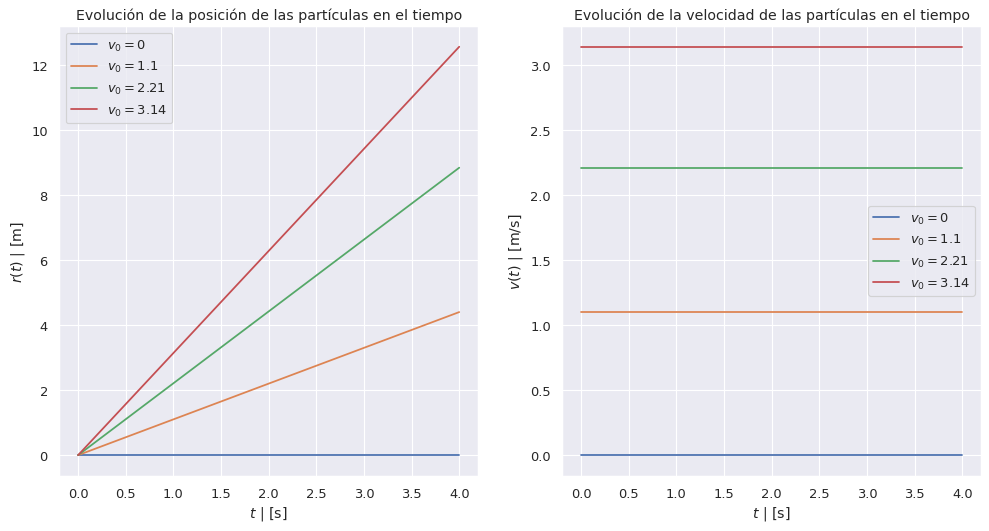

In [107]:
fig, ax = plt.subplots(1,2,figsize=(14,7),dpi=85)

d=[]
for v0 in [0,1.1,2.21,3.14]:
    ax[0].plot(T,r(T,v0,0),label=r'$v_{0} = $'+str(v0))
    ax[1].plot(T,vel(T,v0),label=r'$v_{0} = $'+str(v0))
    
ax[0].legend()
ax[1].legend()

ax[0].set_ylabel(r'$r(t)$ | [m]')
ax[0].set_xlabel(r'$t$ | [s]')


ax[1].set_ylabel(r'$v(t)$ | [m/s]')
ax[1].set_xlabel(r'$t$ | [s]')


ax[0].set_title("Evolución de la posición de las partículas en el tiempo")
ax[1].set_title("Evolución de la velocidad de las partículas en el tiempo")

plt.show()